--- Primeras filas del dataset ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      

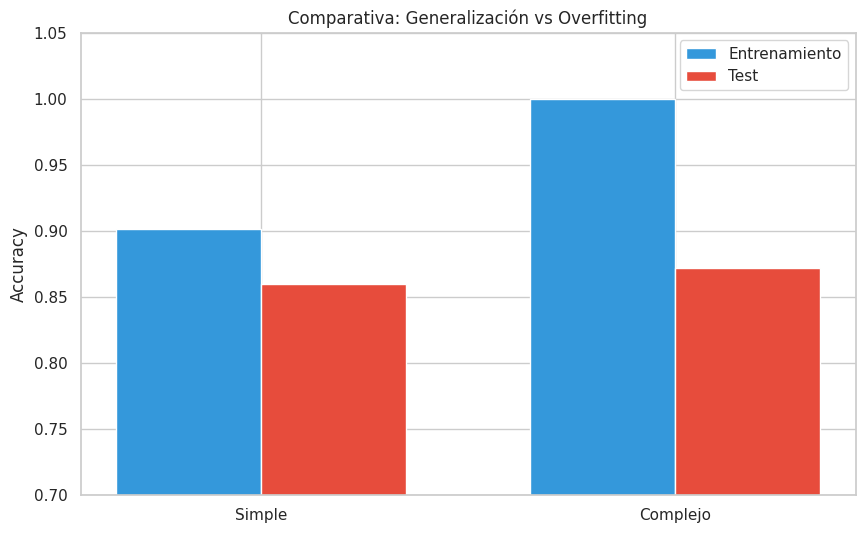

"\nRESUMEN PARA CLASE:\n- El modelo 'Complejo' tiene una precisión de casi el 100% en entrenamiento, \n  pero su rendimiento en Test cae. ¡Eso es Overfitting!\n- El modelo 'Simple' es más honesto y generaliza mejor.\n"

In [ ]:
# -*- coding: utf-8 -*-
"""
Notebook 1: Introducción al Machine Learning y Flujo de Trabajo
Tema 1: Conceptos clave, Regresión vs Clasificación y Overfitting.
Dataset: UCI Wine Quality (Calidad del Vino)
Duración estimada: 30 minutos.
"""

# ---------------------------------------------------------
# 1. IMPORTACIÓN DE LIBRERÍAS
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Configuración estética
sns.set_theme(style="whitegrid")

In [ ]:
# ---------------------------------------------------------
# 2. CARGA DEL DATASET INDUSTRIAL
# ---------------------------------------------------------
# El dataset de calidad de vino mide atributos físico-químicos.
# En un entorno industrial, esto equivale a sensores de calidad de producto.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

print("--- Primeras filas del dataset ---")
print(data.head())

# Para este ejercicio, convertiremos el problema en una clasificación binaria:
# Vino "Bueno" (Calidad >= 7) vs Vino "Normal/Malo" (Calidad < 7)
data['good_quality'] = (data['quality'] >= 7).astype(int)
X = data.drop(['quality', 'good_quality'], axis=1)
y = data['good_quality']

In [ ]:
# ---------------------------------------------------------
# 3. DIVISIÓN DE DATOS: TRAIN / TEST SPLIT (Hito Técnico)
# ---------------------------------------------------------
# Explicación: Nunca evaluamos un modelo con los mismos datos que usó para aprender.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDatos totales: {len(X)}")
print(f"Datos de entrenamiento: {len(X_train)}")
print(f"Datos de test: {len(X_test)}")

In [ ]:
# ---------------------------------------------------------
# 4. ENTRENAMIENTO Y CONCEPTO DE OVERFITTING
# ---------------------------------------------------------
# Vamos a entrenar dos modelos:
# 1. Un árbol "equilibrado" (Simple)
# 2. Un árbol "infinito" (Complejo -> Riesgo de Overfitting)

model_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
model_complex = DecisionTreeClassifier(max_depth=None, random_state=42) # Se ajustará demasiado a los datos

model_simple.fit(X_train, y_train)
model_complex.fit(X_train, y_train)

In [ ]:
# ---------------------------------------------------------
# 5. EVALUACIÓN Y COMPARATIVA
# ---------------------------------------------------------
def evaluate(model, name):
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Modelo {name}:")
    print(f" - Precisión en Entrenamiento: {train_acc:.4f}")
    print(f" - Precisión en Test: {test_acc:.4f}")
    return train_acc, test_acc

acc_simple = evaluate(model_simple, "Simple (Profundidad=3)")
acc_complex = evaluate(model_complex, "Complejo (Sin límite)")


In [ ]:
# ---------------------------------------------------------
# 6. VISUALIZACIÓN DEL APRENDIZAJE
# ---------------------------------------------------------
labels = ['Simple', 'Complejo']
train_scores = [acc_simple[0], acc_complex[0]]
test_scores = [acc_simple[1], acc_complex[1]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Entrenamiento', color='#3498db')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='#e74c3c')

ax.set_ylabel('Accuracy')
ax.set_title('Comparativa: Generalización vs Overfitting')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0.7, 1.05)

plt.show()

"""
RESUMEN PARA CLASE:
- El modelo 'Complejo' tiene una precisión de casi el 100% en entrenamiento,
  pero su rendimiento en Test cae. ¡Eso es Overfitting!
- El modelo 'Simple' es más honesto y generaliza mejor.
"""